In [5]:
# PyTorch
import torch
from torch import optim
from torch.nn import MSELoss
from torch.utils.data import TensorDataset, DataLoader, random_split

# Numpy
import numpy as np

# Plot
import matplotlib.pyplot as plt


# User-Defined Class
from model import sin_ml, sin_qml
from trainer import trainer

%matplotlib inline


### Data 생성

In [7]:
# 데이터 생성
num_data = 20000  # 총 데이터 개수
batch_size = 128  # 배치 크기

# 입력 데이터 생성 (0부터 2π 사이의 값)
x_data = torch.rand(num_data, 1) * 2 * torch.pi  # (20000, 1) shape로 생성
y_data = torch.sin(x_data)*1  # sin 함수로 출력 생성 (20000, 1)

# 텐서 데이터셋 생성
dataset = TensorDataset(x_data, y_data)

# Train/Test set 분할 (80%/20% 비율)
train_size = int(0.8 * num_data)
test_size = num_data - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# DataLoader 생성
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# 배치 예시 출력
x_batch, y_batch = next(iter(train_loader))
print("Example batch x:", x_batch.shape)  # Expected: [128, 1]
print("Example batch y:", y_batch.shape)  # Expected: [128, 1]


Example batch x: torch.Size([128, 1])
Example batch y: torch.Size([128, 1])


### ML model 선언

In [3]:
model1 = sin_ml(hidden_dim=512, num_layer=2)
trainer1 = trainer(model1, train_loader=train_loader, test_loader=train_loader)

 25%|██▌       | 5/20 [00:43<02:11,  8.79s/it]


KeyboardInterrupt: 

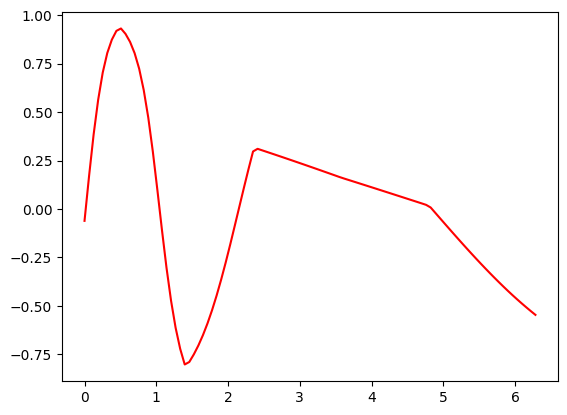

In [4]:
plt.ion()

trainer1.train(20 ,True)

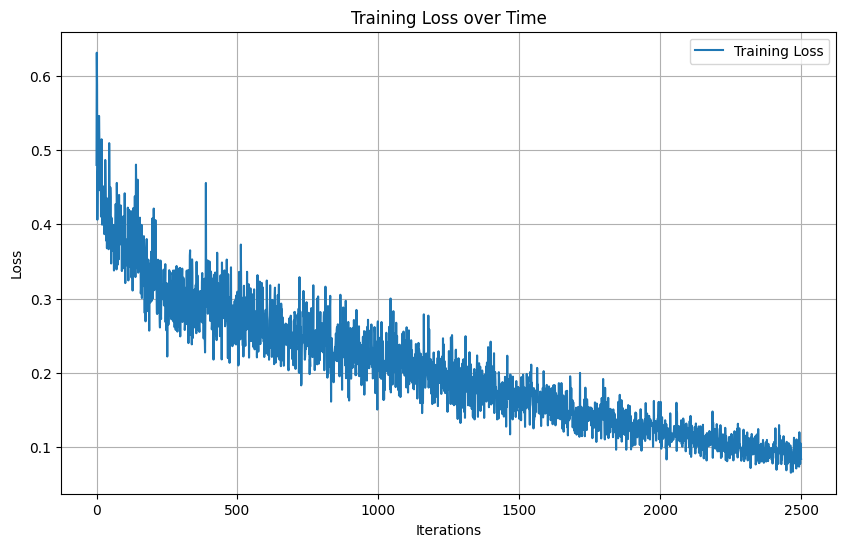

In [157]:
trainer1.plot_list(trainer1.train_loss_list)

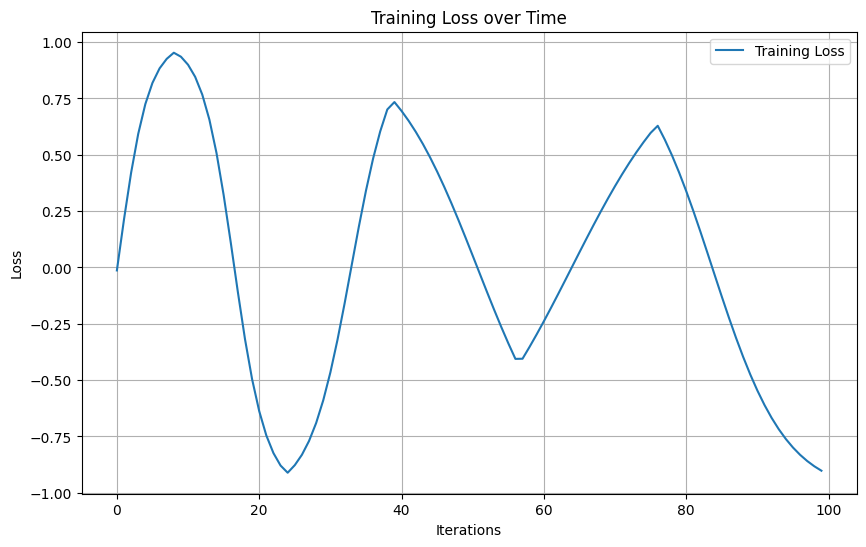

In [158]:
trainer1.plot_pred()


### QML Model 선언

In [8]:
model2 = sin_qml(num_qubit=1, num_layer=2)
trainer2 = trainer(model2, train_loader=train_loader, test_loader=train_loader  ,lr=0.001)
model2.state_dict()

OrderedDict([('theta', tensor([0.6916, 0.6990]))])

100%|██████████| 10/10 [01:20<00:00,  8.05s/it]


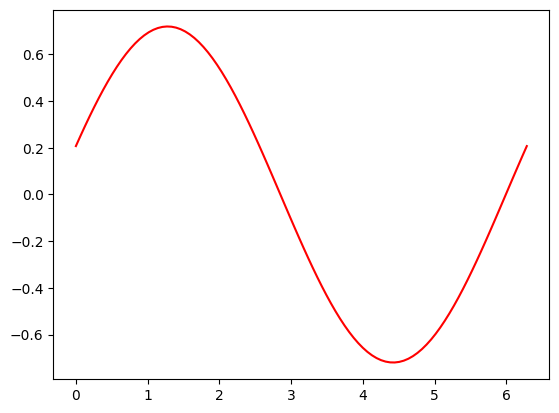

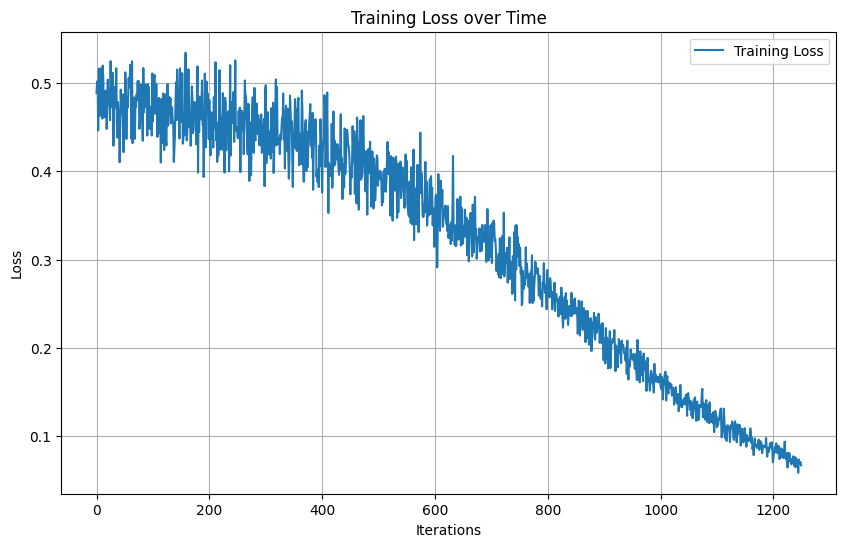

In [10]:
plt.ion()
trainer2.train(10,True)

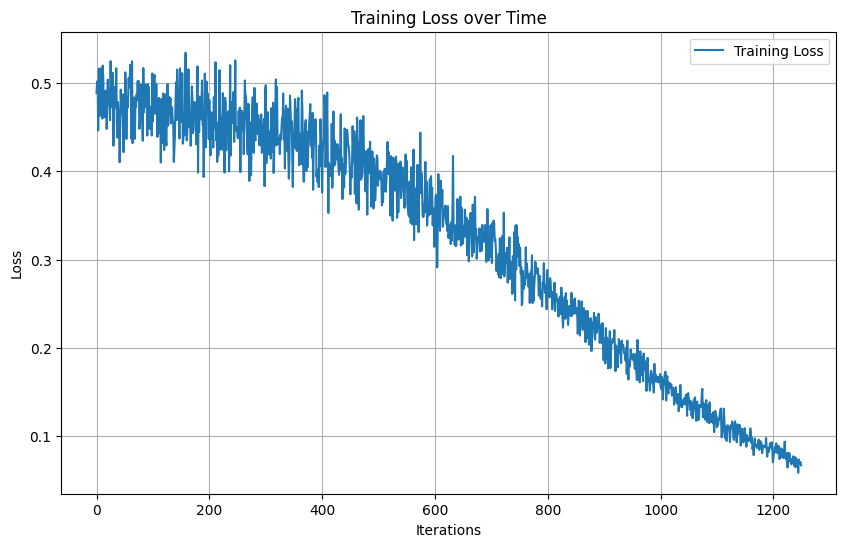

In [11]:
trainer2.plot_list(trainer2.train_loss_list)

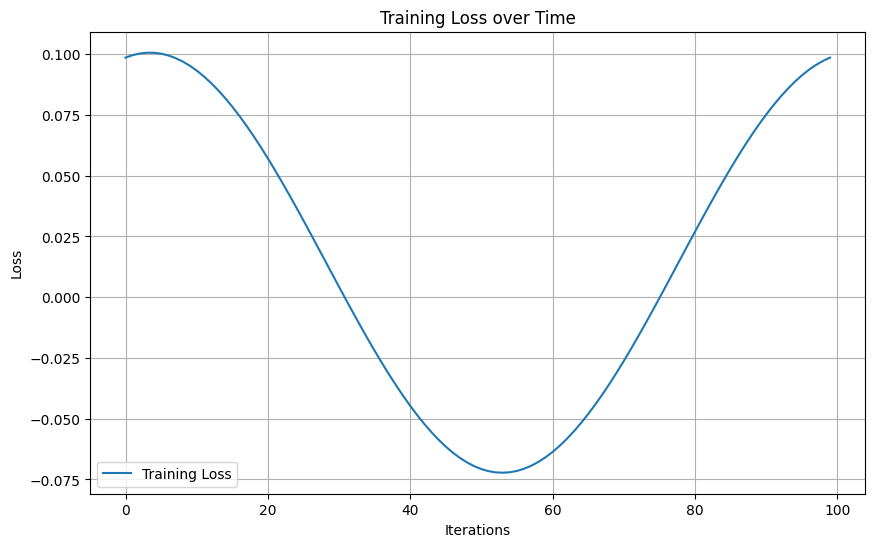

In [ ]:
trainer2.

In [18]:
thetas = list(model2.state_dict().values())
thetas[0]

tensor([-1.2785,  0.7676])

In [168]:
OrderedDict([('theta', tensor([0.3007, 0.3805, 0.3613, 0.1224])),
             ('input_layer.weight',
              tensor([[ 0.3367],
                      [-0.0929],
                      [ 0.9109],
                      [-0.7979]])),
             ('input_layer.bias',
              tensor([ 0.7100, -0.1172,  0.3952, -0.4559]))])

NameError: name 'OrderedDict' is not defined